<a href="https://colab.research.google.com/github/sankaravignesh2002/Election_Trend_Prediction-2019/blob/main/project_election.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ELECTION TREND PREDICTION**



In [ ]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
import seaborn as sns
import numpy as np


In [ ]:
#importing the data set
vote = pd.read_csv(r"/content/LS_2.0.csv")

# **PREPROCESSING AND EDA**

In [ ]:
vote.isna().sum()

STATE                                          0
CONSTITUENCY                                   0
NAME                                           0
WINNER                                         0
PARTY                                          0
SYMBOL                                       245
GENDER                                       245
CRIMINAL\nCASES                              245
AGE                                          245
CATEGORY                                     245
EDUCATION                                    245
ASSETS                                       245
LIABILITIES                                  245
GENERAL\nVOTES                                 0
POSTAL\nVOTES                                  0
TOTAL\nVOTES                                   0
OVER TOTAL ELECTORS \nIN CONSTITUENCY          0
OVER TOTAL VOTES POLLED \nIN CONSTITUENCY      0
TOTAL ELECTORS                                 0
dtype: int64

In [ ]:
#Cleaning up the Assets and Liabilities columns
def value_cleaner(x):
    try:
        str_temp = (x.split('Rs')[1].split('\n')[0].strip())
        str_temp_2 = ''
        for i in str_temp.split(","):
            str_temp_2 = str_temp_2+i
        return str_temp_2
    except:
        x = 0
        return x
vote['ASSETS'] = vote['ASSETS'].apply((value_cleaner))
vote['LIABILITIES'] = vote['LIABILITIES'].apply((value_cleaner))
vote.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL\nCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,3099414,231450,376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,18477888,847000,318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,36491000,15300000,314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,0,0,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,74274036,8606522,644459,2416,646875,33.383823,56.464615,1937690


In [ ]:
#Renaming the columns
vote.rename(columns={"CRIMINAL\nCASES": "CRIMINAL CASES", "GENERAL\nVOTES": "GENERAL VOTES", "POSTAL\nVOTES": "POSTAL VOTES","TOTAL\nVOTES": "TOTAL VOTES","OVER TOTAL ELECTORS \nIN CONSTITUENCY": "OVER TOTAL ELECTORS IN CONSTITUENCY","OVER TOTAL VOTES POLLED \nIN CONSTITUENCY": "OVER TOTAL VOTES POLLED IN CONSTITUENCY"}, inplace=True)

In [ ]:
#Updating the data types for the analysis
vote['ASSETS']=pd.to_numeric(vote['ASSETS'])
vote['LIABILITIES']=pd.to_numeric(vote['LIABILITIES'])
vote['CRIMINAL CASES'].replace({np.NaN:0})
vote['CRIMINAL CASES'] = pd.to_numeric(vote['CRIMINAL CASES'], errors='coerce').fillna(0).astype(np.int64)

In [ ]:
#Label encoding the columns to change the values to numeric values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
vote.iloc[:,0] = le.fit_transform(vote.iloc[:,0])
vote.iloc[:,1] = le.fit_transform(vote.iloc[:,1])
vote.iloc[:,2] = le.fit_transform(vote.iloc[:,2])
vote.iloc[:,4] = le.fit_transform(vote.iloc[:,4])
vote.iloc[:,5] = le.fit_transform(vote.iloc[:,5])
vote.iloc[:,6] = le.fit_transform(vote.iloc[:,6])
vote.iloc[:,9] = le.fit_transform(vote.iloc[:,9])
vote.iloc[:,10] = le.fit_transform(vote.iloc[:,10])
vote

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL CASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL VOTES,POSTAL VOTES,TOTAL VOTES,OVER TOTAL ELECTORS IN CONSTITUENCY,OVER TOTAL VOTES POLLED IN CONSTITUENCY,TOTAL ELECTORS
0,31,0,1713,1,26,80,1,52,52.0,2,1,3099414,231450,376892,482,377374,25.330684,35.468248,1489790
1,31,0,700,0,120,32,1,0,54.0,2,11,18477888,847000,318665,149,318814,21.399929,29.964370,1489790
2,31,0,1498,0,46,66,1,3,52.0,2,1,36491000,15300000,314057,181,314238,21.092771,29.534285,1489790
3,31,0,1203,0,81,126,2,0,NaN,3,13,0,0,13030,6,13036,0.875023,1.225214,1489790
4,33,1,1789,1,26,80,1,5,58.0,1,4,74274036,8606522,644459,2416,646875,33.383823,56.464615,1937690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2258,19,537,184,0,47,99,1,0,43.0,0,11,4890000,1020000,14661,25,14686,0.766419,1.250060,1916185
2259,31,538,224,1,120,32,1,18,63.0,0,5,1287851556,11535000,434066,178,434244,28.975369,41.574183,1498666
2260,31,538,998,0,46,66,1,0,49.0,0,11,903663001,0,427900,115,428015,28.559732,40.977823,1498666
2261,31,538,249,0,26,80,1,3,47.0,0,1,58577327,5250000,138731,216,138947,9.271379,13.302678,1498666


In [ ]:
#filling the nota's age value to 0
vote["AGE"].fillna(0, inplace = True)

In [ ]:
#Creating Sunburst image of all states and constituencies
st_val=vote[["STATE","CONSTITUENCY","TOTAL ELECTORS"]]
fig=px.sunburst(st_val,path=['STATE','CONSTITUENCY']
                ,values='TOTAL ELECTORS',
               color='TOTAL ELECTORS',
               color_continuous_scale='viridis_r')
fig.update_layout(title_text='Sunburst Image of States and Constituencies',
                  template='plotly_dark')
fig.show()


In [ ]:
#Finding the gender distribution
req=pd.DataFrame(vote['GENDER'])
fig=px.pie(req,names='GENDER')
fig.update_layout(title_text='Gender Distribution in Participation',
                  template='plotly_dark')
fig.show()

In [ ]:
#Finding the gender distribution among win counts
gen=vote.groupby('GENDER').apply(lambda x:x['NAME'].count()).reset_index(name='counts')
gen['CATEGORY']='Overall gender ratio'
winners=vote[vote['WINNER']==1]
gen_win=winners.groupby('GENDER').apply(lambda x:x['NAME'].count()).reset_index(name='counts')
gen_win['CATEGORY']='Winning gender ratio'
total=pd.concat([gen_win,gen])

fig=px.bar(total,x='GENDER',y='counts',color='CATEGORY',barmode='group')
fig.update_layout(title_text='Participation vs Win counts',
                  template='plotly_dark')
fig.show()

Text(0.5, 1.0, 'Statewise report card for the Political Parties in India')

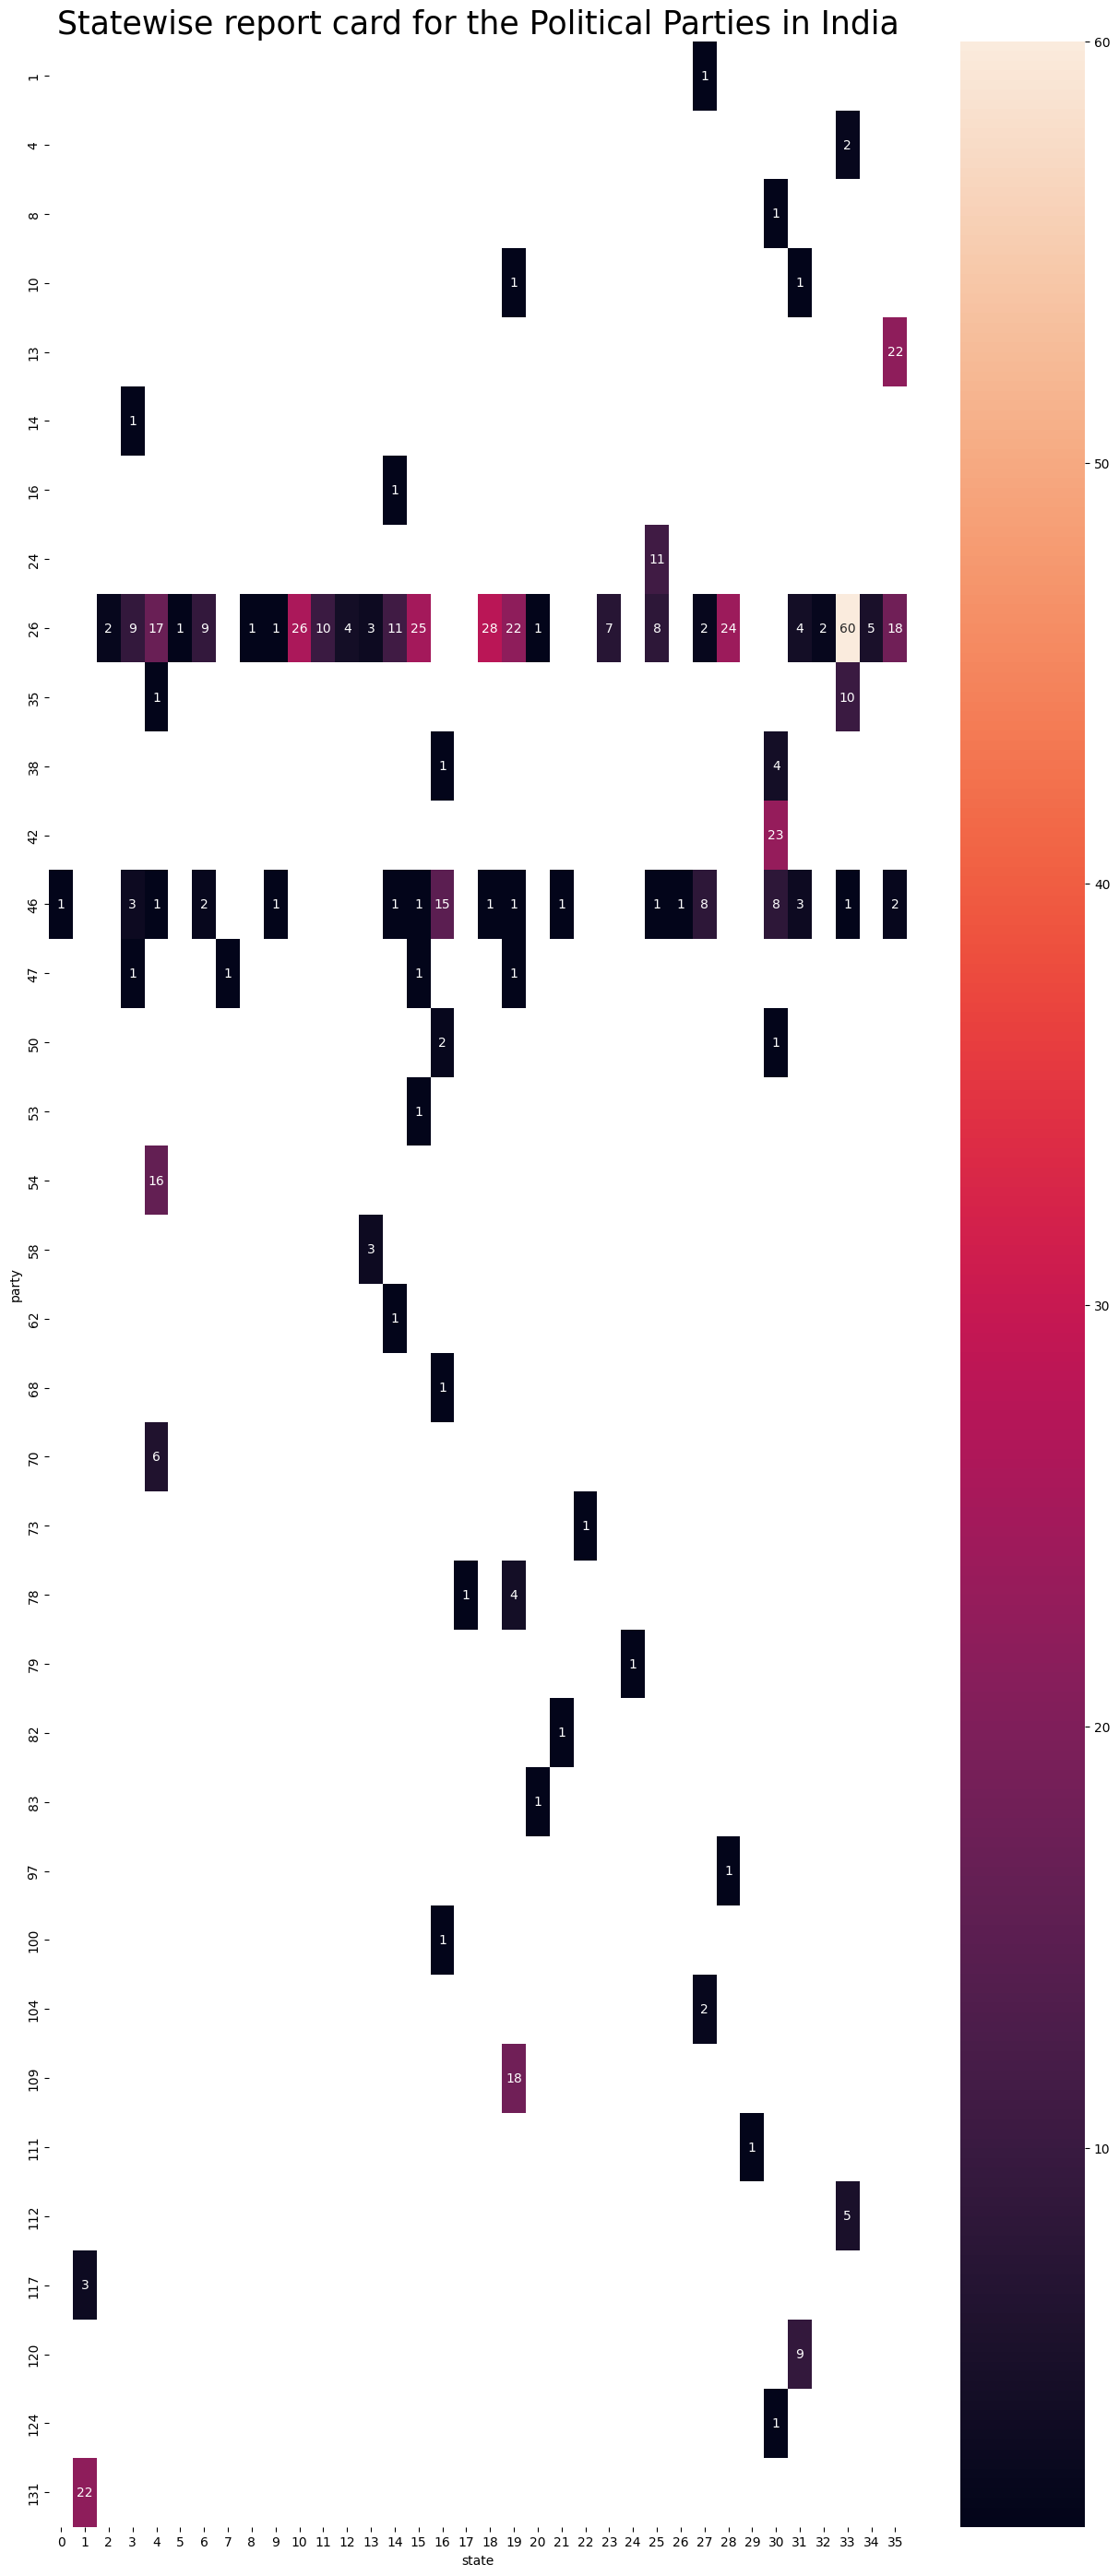

In [ ]:
#Each Party's Statewise performance report
st_party=winners.groupby(['PARTY','STATE'])['WINNER'].sum()\
.reset_index(name='wins')
pivot_st_party=pd.pivot(st_party,index='PARTY',columns='STATE',values='wins')
plt.figure(figsize=(15,35))
sns.heatmap(pivot_st_party,annot=True,fmt="g")
plt.xlabel('state')
plt.ylabel('party')
plt.title('Statewise report card for the Political Parties in India',size=25)

In [ ]:
#Education Qualification of Candidates and the Winners
ed_cnt=vote.groupby('EDUCATION')['NAME'].count().reset_index(name='counts')
fig=go.Figure(data=[go.Pie(labels=ed_cnt['EDUCATION'],values=ed_cnt['counts'],
                           pull=[0.1, 0.2, 0, 0.1, 0.2, 0,0.1, 0.1, 0.2,0, 0.1, 0.2],
                           title='Education Qualification of the Candidates')])
                           

fig.update_layout(title_text='Overall Education Qualification of all the Candidates',
                  template='plotly_dark')
fig.show()

ed_win_cnt=winners.groupby('EDUCATION').apply(lambda x:x['PARTY'].count()) \
.reset_index(name='counts')
fig2 = go.Figure(data=[go.Pie(labels=ed_win_cnt['EDUCATION'], values=ed_win_cnt['counts'], 
                              pull=[0.1, 0.2, 0, 0.1, 0.2, 0,0.1, 0.1, 0.2,0, 0.1, 0.2],
                              title='Education Qualification of the Winners')])
fig2.update_layout(title_text='Education Qualification of the Winners',template='plotly_dark')
fig2.show()


In [ ]:
#scaling the values into the range 0-1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
vote= pd.DataFrame(scaler.fit_transform(vote))
vote

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.885714,0.000000,0.850969,1.0,0.196970,0.634921,0.5,0.216667,0.604651,0.666667,0.076923,0.000346,0.000150,0.352471,0.024888,0.352345,0.486620,0.469519,0.463504
1,0.885714,0.000000,0.347740,0.0,0.909091,0.253968,0.5,0.000000,0.627907,0.666667,0.846154,0.002065,0.000547,0.297823,0.007693,0.297474,0.410814,0.394546,0.463504
2,0.885714,0.000000,0.744163,0.0,0.348485,0.523810,0.5,0.012500,0.604651,0.666667,0.076923,0.004077,0.009887,0.293498,0.009346,0.293186,0.404891,0.388687,0.463504
3,0.885714,0.000000,0.597615,0.0,0.613636,1.000000,1.0,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.010972,0.000310,0.010957,0.014986,0.003067,0.463504
4,0.942857,0.001859,0.888723,1.0,0.196970,0.634921,0.5,0.020833,0.674419,0.333333,0.307692,0.008299,0.005562,0.603594,0.124748,0.604869,0.641927,0.755527,0.608215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2258,0.542857,0.998141,0.091406,0.0,0.356061,0.785714,0.5,0.000000,0.500000,0.000000,0.846154,0.000546,0.000659,0.012503,0.001291,0.012503,0.012892,0.003406,0.601267
2259,0.885714,1.000000,0.111277,1.0,0.909091,0.253968,0.5,0.075000,0.732558,0.000000,0.384615,0.143891,0.007454,0.406131,0.009191,0.405633,0.556909,0.552692,0.466371
2260,0.885714,1.000000,0.495777,0.0,0.348485,0.523810,0.5,0.000000,0.569767,0.000000,0.846154,0.100966,0.000000,0.400344,0.005938,0.399796,0.548893,0.544569,0.466371
2261,0.885714,1.000000,0.123696,0.0,0.196970,0.634921,0.5,0.012500,0.546512,0.000000,0.076923,0.006545,0.003393,0.128948,0.011153,0.128937,0.176912,0.167584,0.466371


# **MODELLING**

In [ ]:
X=vote.iloc[:,vote.columns!=3]
y=vote.iloc[:,3]

In [ ]:
#Splitting the dataset to train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


**LINEAR REGRESSION**

In [ ]:
from sklearn import linear_model, metrics

In [ ]:
# create linear regression model
model_lin = linear_model.LinearRegression()

In [ ]:
# train the model using the training sets
model_lin.fit(X_train, y_train)

LinearRegression()

In [ ]:
# predicting the test set results
y_pred = model_lin.predict(X_test)

In [ ]:
# Results of Linear Regression.
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean Square Error : ", mse)

Mean Square Error :  0.07626493012894818


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print('R-squared value:', r2)

R-squared value: 0.5406927987443964


In [ ]:
# Evaluate the model on the test set
test_score = model_lin.score(X_test, y_test)
print(f"Test score: {test_score}")

Test score: 0.5406927987443964


**LOGISTIC REGRESSION**

In [ ]:
from sklearn.linear_model import LogisticRegression
model_log = LogisticRegression()
model_log.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# predicting the test set results
y_pred = model_log.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print('R-squared value:', r2)

R-squared value: 0.6488635722745474


In [ ]:
# Evaluate the model on the test set
test_score = model_log.score(X_test, y_test)
print(f"Test score: {test_score}")

Test score: 0.941696113074205


**DECISION TREE**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz

In [ ]:
#building the Decision Tree classifier
dt = DecisionTreeClassifier()
model_dt = dt.fit(X_train, y_train)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
reg = DecisionTreeRegressor(max_depth=5)

In [ ]:
reg.fit(X, y)
DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
max_features=None, max_leaf_nodes=None,
min_impurity_decrease=0.0, #min_impurity_split=None,

min_samples_leaf=1, min_samples_split=2,
min_weight_fraction_leaf=0.0, #presort='deprecated',
random_state=None, splitter='best')

DecisionTreeRegressor(criterion='mse', max_depth=5)

In [ ]:
from sklearn.tree import plot_tree

[Text(0.5318627450980392, 0.9166666666666666, 'x[16] <= 0.593\nsquared_error = 0.181\nsamples = 2263\nvalue = 0.238'),
 Text(0.2696078431372549, 0.75, 'x[16] <= 0.552\nsquared_error = 0.039\nsamples = 1763\nvalue = 0.041'),
 Text(0.14705882352941177, 0.5833333333333334, 'x[16] <= 0.423\nsquared_error = 0.02\nsamples = 1660\nvalue = 0.02'),
 Text(0.0784313725490196, 0.4166666666666667, 'x[10] <= 0.065\nsquared_error = 0.001\nsamples = 1341\nvalue = 0.001'),
 Text(0.0392156862745098, 0.25, 'x[6] <= 0.019\nsquared_error = 0.001\nsamples = 1310\nvalue = 0.001'),
 Text(0.0196078431372549, 0.08333333333333333, 'squared_error = 0.0\nsamples = 1251\nvalue = 0.0'),
 Text(0.058823529411764705, 0.08333333333333333, 'squared_error = 0.017\nsamples = 59\nvalue = 0.017'),
 Text(0.11764705882352941, 0.25, 'x[7] <= 0.808\nsquared_error = 0.031\nsamples = 31\nvalue = 0.032'),
 Text(0.09803921568627451, 0.08333333333333333, 'squared_error = 0.0\nsamples = 30\nvalue = 0.0'),
 Text(0.13725490196078433, 0.

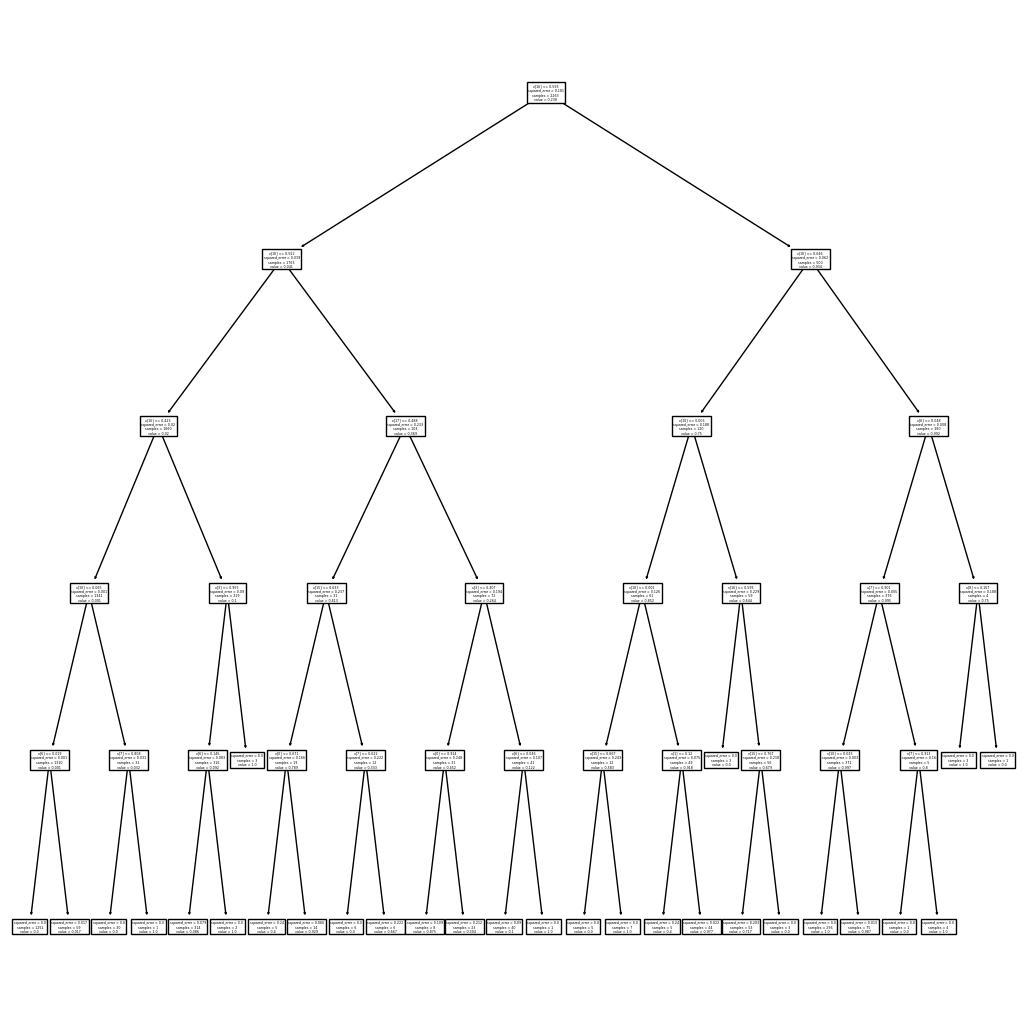

In [ ]:
fig, ax = plt.subplots(figsize=(13, 13))
plot_tree(reg,ax=ax)


In [ ]:
y_hat =model_dt.predict(X_test)

In [ ]:
# Get the information gain, Gini index, and gain ratio for each feature
importances = model_dt.feature_importances_
gini_importances = dt.tree_.compute_feature_importances(normalize=False)
n_features = len(X.columns)

print("Feature\tInformation Gain\tGini Index\tGain Ratio")
for i in range(n_features):
    print(f"{X.columns[i]}\t{importances[i]:.4f}\t\t{gini_importances[i]:.4f}\t\t{(importances[i]/gini_importances[i]):.4f}")

Feature	Information Gain	Gini Index	Gain Ratio
0	0.0153		0.0057		2.6847
1	0.0066		0.0025		2.6847
2	0.0112		0.0042		2.6847
4	0.0104		0.0039		2.6847
5	0.0035		0.0013		2.6847
6	0.0000		0.0000		nan
7	0.0111		0.0041		2.6847
8	0.0170		0.0064		2.6847
9	0.0000		0.0000		nan
10	0.0050		0.0019		2.6847
11	0.0127		0.0047		2.6847
12	0.0087		0.0032		2.6847
13	0.0036		0.0014		2.6847
14	0.0234		0.0087		2.6847
15	0.0059		0.0022		2.6847
16	0.0298		0.0111		2.6847
17	0.8207		0.3057		2.6847
18	0.0151		0.0056		2.6847


<ipython-input-54-d0e2afc4b11c>:8: RuntimeWarning:

invalid value encountered in double_scalars



In [ ]:
# Evaluate the model on the test set
test_score = model_dt.score(X_test, y_test)
print(f"Test score: {test_score}")

Test score: 0.9346289752650176


**RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Define the model
model_rf = RandomForestRegressor(n_estimators=100, max_depth=20, random_state=42)

In [ ]:
# Train the model
model_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, random_state=42)

In [ ]:
y_pred = model_rf.predict(X_test)

In [ ]:
# Evaluate the model on the test set
test_score = model_rf.score(X_test, y_test)
print(f"Test score: {test_score}")

Test score: 0.7738149380557592


**NEURAL NETWORK(CNN)**

In [ ]:
pip install tensorflow
pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# Define the CNN architecture
model = keras.Sequential([
    layers.Dense(64, activation="relu", input_shape=(18,)),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [ ]:
# Compile the model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/10
107/107 [==============================] - 3s 9ms/step - loss: 0.4141 - accuracy: 0.8179 - val_loss: 0.2499 - val_accuracy: 0.8958
Epoch 2/10
107/107 [==============================] - 0s 3ms/step - loss: 0.2217 - accuracy: 0.9093 - val_loss: 0.1938 - val_accuracy: 0.9223
Epoch 3/10
107/107 [==============================] - 0s 3ms/step - loss: 0.2009 - accuracy: 0.9087 - val_loss: 0.1780 - val_accuracy: 0.9223
Epoch 4/10
107/107 [==============================] - 1s 5ms/step - loss: 0.1839 - accuracy: 0.9151 - val_loss: 0.1823 - val_accuracy: 0.9223
Epoch 5/10
107/107 [==============================] - 1s 5ms/step - loss: 0.1780 - accuracy: 0.9216 - val_loss: 0.1981 - val_accuracy: 0.9081
Epoch 6/10
107/107 [==============================] - 1s 5ms/step - loss: 0.1871 - accuracy: 0.9151 - val_loss: 0.1629 - val_accuracy: 0.9311
Epoch 7/10
107/107 [==============================] - 1s 5ms/step - loss: 0.1707 - accuracy: 0.9240 - val_loss: 0.1522 - val_accuracy: 0.9364
Epoch 

In [ ]:
y_pred = model.predict(X_test)

18/18 [==============================] - 0s 6ms/step


In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test loss: {test_loss}, Test accuracy: {test_acc}")

18/18 [==============================] - 0s 4ms/step - loss: 0.1426 - accuracy: 0.9311
Test loss: 0.14256615936756134, Test accuracy: 0.9310954213142395


From the above modellings **Logistic regression** gives best accuracy(0.94)